## Q3. Build a linear regression model from scratch for Salary data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users 2.0/Desktop/Jenifa/AI-ML/Datasets/Salary_Data.csv")  
X = data['YearsExperience'].values
y = data['Salary'].values
X = X.reshape(-1, 1)

w = np.zeros(X.shape[1])
b = 0
learning_rate = 0.01
epochs = 1000

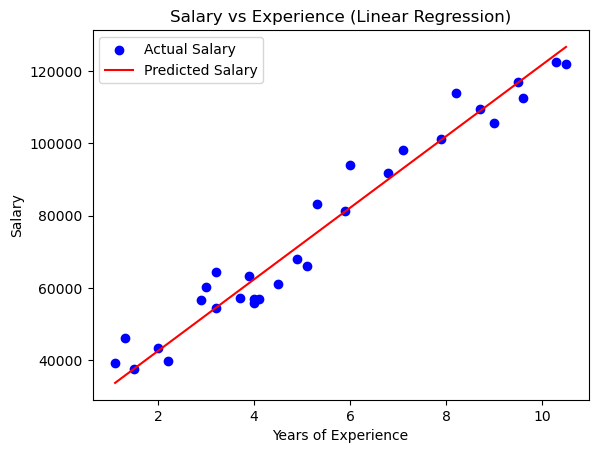

Final weight (slope): [9876.11275288]
Final bias (intercept): 22920.485548522254


In [2]:
def predict(X, w, b):
    return np.dot(X, w) + b

def cost(X, y, w, b):
    m = len(y)
    return np.sum((predict(X, w, b) - y) ** 2) / (2 * m)

def gradient_descent(X, y, w, b, learning_rate, epochs):
    m = len(y)
    cost_history = []
    for i in range(epochs):
        y_pred = predict(X, w, b)
        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y) / m
        w -= learning_rate * dw
        b -= learning_rate * db
        cost_history.append(cost(X, y, w, b))
    return w, b, cost_history

w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, epochs)
y_pred = predict(X, w, b)

plt.scatter(X, y, color='blue', label='Actual Salary')
plt.plot(X, y_pred, color='red', label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Linear Regression)')
plt.legend()
plt.show()

print("Final weight (slope):", w)
print("Final bias (intercept):", b)


In [3]:
#************************************************************************************************************

## Q4. Develop a logistic regression model to classify emails as spam or not spam.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [5]:
email_data = pd.DataFrame({
    'text': [
        "Limited time offer, buy now!", 
        "Team meeting agenda and notes", 
        "Congratulations, you've won a prize!", 
        "Reminder: Doctor's appointment tomorrow", 
        "Claim your discount today", 
        "Final project deadline submission", 
        "Exclusive deal, click here", 
        "Lunch with friends this weekend?"
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0]  # 1 for spam, 0 for not spam
})


In [6]:
X = email_data['text']
y = email_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [9]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 33.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\shatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
new_email = [input("Enter the email content: ")]
new_email_tfidf = vectorizer.transform(new_email)
prediction = model.predict(new_email_tfidf)
print(f"New email classified as: {'Spam' if prediction[0] == 1 else 'Not Spam'}")


Enter the email content:  hello!


New email classified as: Spam


In [36]:
#******************************************************************************************************************

## Q4. Decision Tree Classifier: Build and visualize a decision tree using the scikit-learn library to classify patients based on medical diagnosis data.

In [22]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
import graphviz

df = pd.read_csv("C:/Users 2.0/Desktop/Jenifa/AI-ML/Datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,Pre-Disease
1,1,85,66,29,0,26.6,0.351,31,Pre-Disease
2,8,183,64,0,0,23.3,0.672,32,Pre-Disease
3,1,89,66,23,94,28.1,0.167,21,Pre-Disease
4,0,137,40,35,168,43.1,2.288,33,Pre-Disease
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,Pre-Disease
762,9,89,62,0,0,22.5,0.142,33,Pre-Disease
763,10,101,76,48,180,32.9,0.171,63,Pre-Disease
764,2,122,70,27,0,36.8,0.340,27,Pre-Disease


In [7]:
diagnosis_mapping = {'Healthy': 0, 'Pre-Disease': 1, 'Disease': 2}
df['Diagnosis'] = df['Diagnosis'].map(diagnosis_mapping)


In [8]:
X = df[['BMI', 'BloodPressure', 'Pregnancies', 'Glucose', 'SkinThickness', 'SkinThickness', 'DiabetesPedigreeFunction', 'DiabetesPedigreeFunction', 'DiabetesPedigreeFunction']]
y = df['Diagnosis']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


In [10]:
dt_classifier = DecisionTreeClassifier(max_depth=3)


In [11]:
missing_values = pd.isnull(y_train).sum()
if missing_values > 0 :
  print(f"Number of missing values in y_train: {missing_values}")
else:
    print("no null")


no null


In [12]:
dt_classifier = DecisionTreeClassifier(max_depth=10)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [13]:
y_pred = dt_classifier.predict(X_test)


In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7956521739130434
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.86      0.92      0.89       200
           2       0.00      0.00      0.00        12

    accuracy                           0.80       230
   macro avg       0.29      0.30      0.30       230
weighted avg       0.75      0.80      0.77       230

Confusion Matrix: 
 [[  0  18   0]
 [ 10 183   7]
 [  1  11   0]]


In [15]:
dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=['BMI', 'BloodPressure', 'Pregnancies', 'Glucose', 'SkinThickness', 'SkinThickness', 'DiabetesPedigreeFunction', 'DiabetesPedigreeFunction', 'DiabetesPedigreeFunction'],
                           class_names=['Healthy', 'Pre-Disease', 'Disease'],
                           filled=True, rounded=True, special_characters=True)


In [16]:
import os
os.environ["PATH"] += os.pathsep + "C:/Users 2.0/Desktop/windows_10_cmake_Release_graphviz-install-12.1.2-win64.exe"

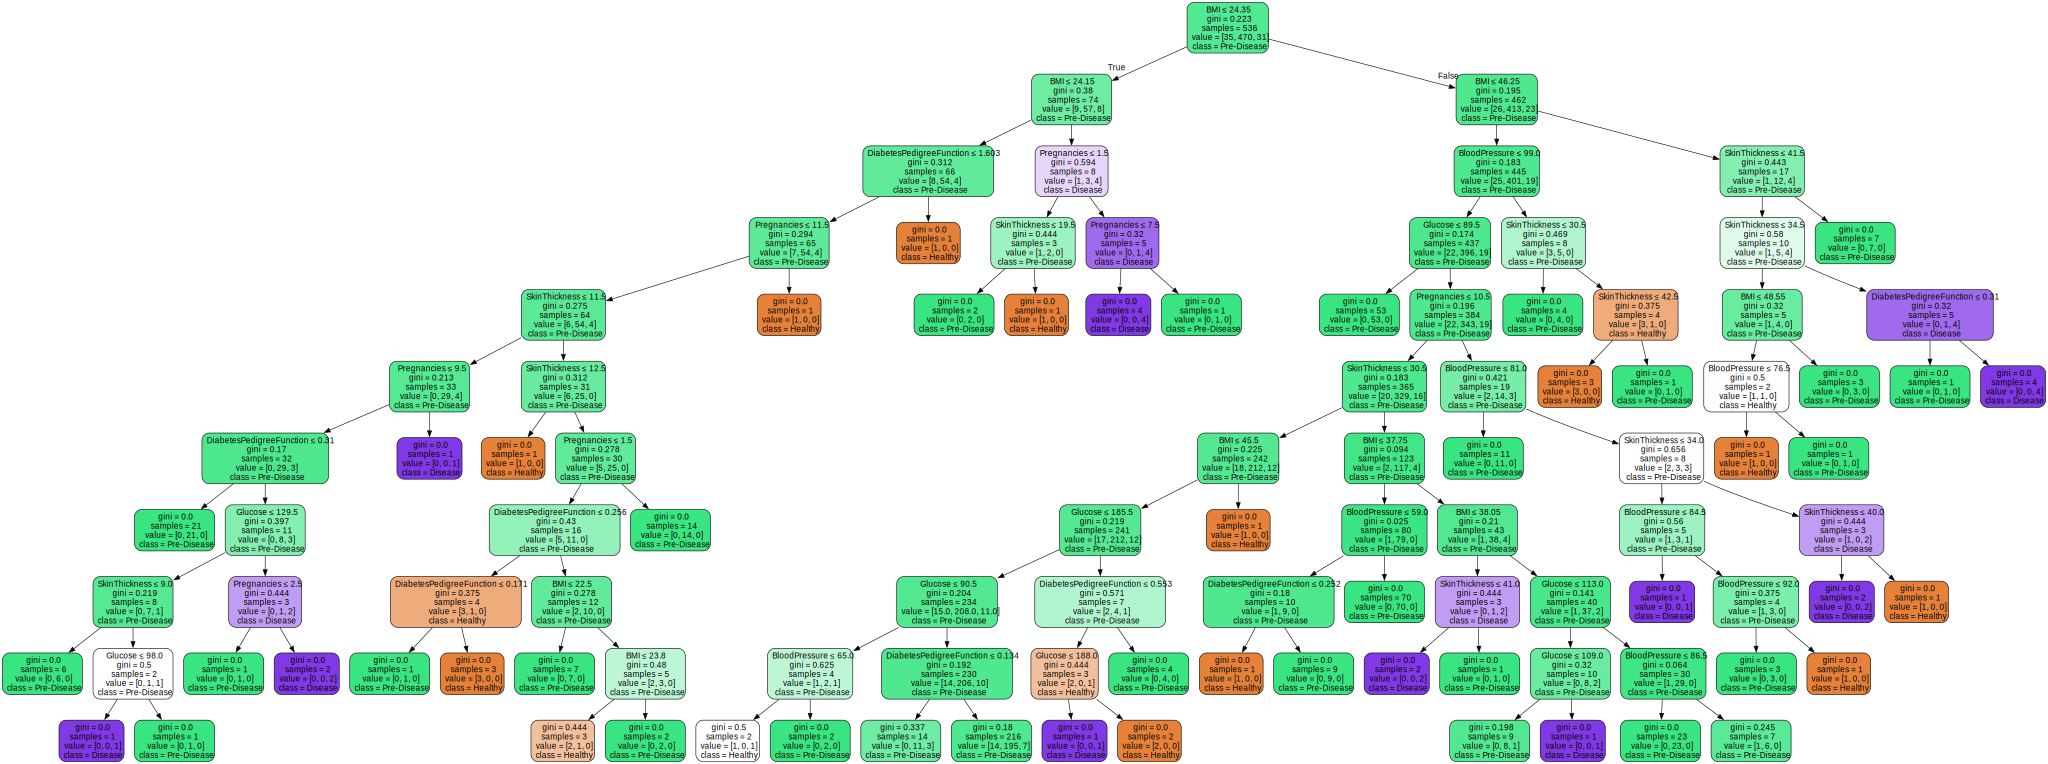

In [17]:
graph = graphviz.Source(dot_data)
graph


In [37]:
#************************************************************************************************************************

## Q5. Random Forest Implementation: Implement a Random Forest model to predict credit risk from financial datasets. **

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv("C:/Users 2.0/Desktop/Jenifa/AI-ML/Datasets/financial_risk_assessment.csv")

In [24]:
df_1.columns

Index(['Age', 'Income', 'Credit Score', 'Loan Am.t', 'Years at Current Job',
       'Debt-to-Income Ratio', 'Assets Value', 'No of Dependents',
       'Pre Defaults', 'Marital Status Change', 'Risk'],
      dtype='object')

In [25]:
df_1['Risk'] = df_1['Risk'].astype(str)

In [26]:
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_1['Risk'] = df_1['Risk'].map(risk_mapping)

In [27]:
X = df_1[['Age', 'Income', 'Credit Score', 'Loan Am.t', 'Years at Current Job', 'Debt-to-Income Ratio', 'Assets Value', 'No of Dependents', 'Pre Defaults', 'Marital Status Change', 'Risk']]
y = df_1['Risk']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [29]:
## Mapping categorical variables 
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
for col in df_1.select_dtypes(include=['object']):
    df_1[col] = df_1[col].map(risk_mapping)


In [30]:
missing_values = y_train.isnull().sum()
print("Number of missing values in y_train:", missing_values)


Number of missing values in y_train: 0


In [31]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [32]:
y_pred = rf_classifier.predict(X_test)


In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.925
Confusion Matrix:
 [[22  0  0]
 [ 0 11  0]
 [ 0  3  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.79      1.00      0.88        11
           2       1.00      0.57      0.73         7

    accuracy                           0.93        40
   macro avg       0.93      0.86      0.87        40
weighted avg       0.94      0.93      0.92        40



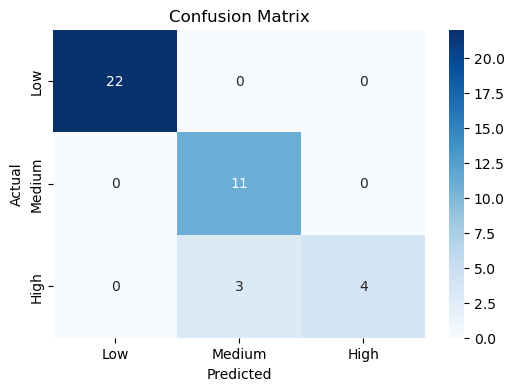

In [209]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Q6. Create a Python program to simulate the gradient descent algorithm showing how it optimizes the cost function.

In [222]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the hypothesis / predictions
def predict(X, theta):
    return np.dot(X, theta)

# Function to compute the cost function
def compute_cost(X, y, theta):
    predictions = predict(X, theta)
    errors = predictions - y
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(y)) * np.sum(sqrErrors)
    return J

# Function to perform gradient descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)  # number of training examples
    J_history = []  # to record cost in every iteration

    for i in range(num_iters):
        predictions = predict(X, theta)
        errors = np.dot(X.transpose(), (predictions - y))
        theta -= (alpha / m) * errors
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history



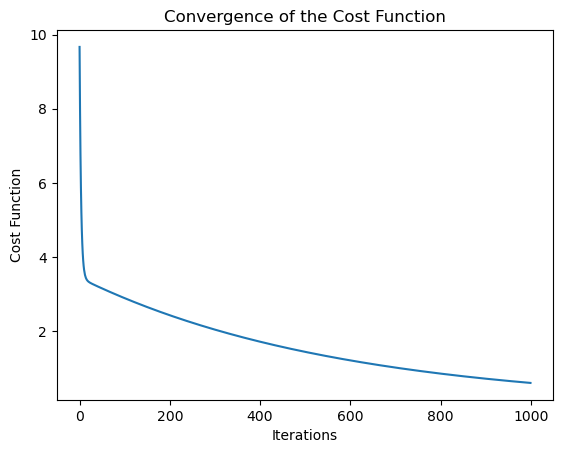

Theta found by gradient descent: [ 5.37763569 -0.05479641]
Final cost: 0.6077268003894648


In [223]:
# Example data
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])  # Added a column of ones for the intercept term
y = np.array([7, 6, 5, 4])
theta = np.array([0.1, 0.2])

# Parameters for the gradient descent
alpha = 0.01  # learning rate
num_iters = 1000  # number of iterations

# Performing gradient descent
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

# Plotting the convergence of the cost function
plt.figure()
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Convergence of the Cost Function")
plt.show()

print("Theta found by gradient descent:", theta)
print("Final cost:", J_history[-1])


'******************************************************************************************************************'

## Q7. Write a Python program to build a basic neural network using NumPy to understand the concepts of forward and backward propagation.

In [225]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Input datasets
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

# Output dataset
expected_output = np.array([[0], [1], [1], [0]])



In [226]:
# Seed the random number generator for reproducibility
np.random.seed(42)

# Initialize weights randomly with mean 0
weights = 2 * np.random.random((2, 1)) - 1

# Bias term
bias = np.random.random(1)

# Learning rate
lr = 0.1

# Store errors for visualization
errors = []

# Training the neural network
for epoch in range(10000):
    # Forward propagation
    input_layer = inputs
    outputs = sigmoid(np.dot(input_layer, weights) + bias)

    # Error calculation
    error = expected_output - outputs
    errors.append(np.mean(np.abs(error)))

    # Backward propagation
    d_predicted_output = error * sigmoid_derivative(outputs)

    # Adjusting weights and bias
    weights += np.dot(input_layer.T, d_predicted_output) * lr
    bias += np.sum(d_predicted_output) * lr

    if epoch % 1000 == 0:
        print(f'Error at epoch {epoch} is {np.mean(np.abs(error))}')



Error at epoch 0 is 0.5049989714986587
Error at epoch 1000 is 0.5000000000026942
Error at epoch 2000 is 0.49999999999999994
Error at epoch 3000 is 0.5000000000000001
Error at epoch 4000 is 0.5
Error at epoch 5000 is 0.5
Error at epoch 6000 is 0.5
Error at epoch 7000 is 0.5
Error at epoch 8000 is 0.5
Error at epoch 9000 is 0.5


Final weights after training:
[[-2.47423496e-16]
 [-2.46840595e-16]]
Final bias after training:
[1.65688047e-16]
Outputs after training:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


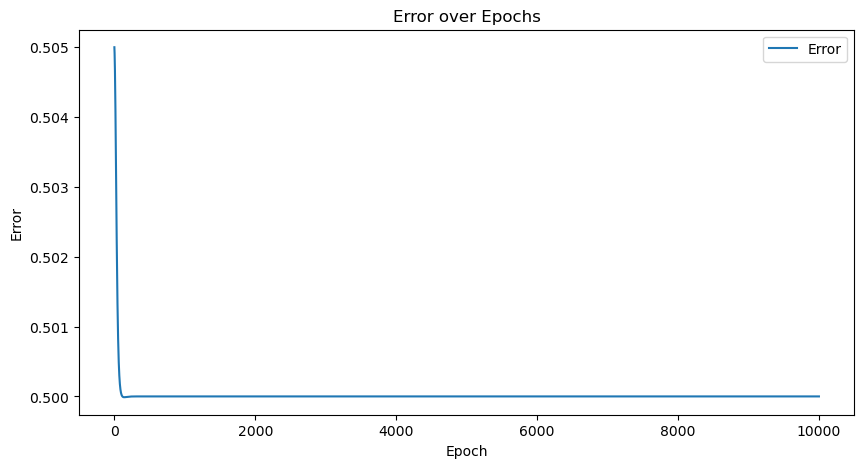

In [227]:
# Display final weights and output from the neural network
print("Final weights after training:")
print(weights)
print("Final bias after training:")
print(bias)
print("Outputs after training:")
print(outputs)

# Visualization of Error over Epochs
plt.figure(figsize=(10, 5))
plt.plot(errors, label='Error')
plt.title('Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()




In [229]:
# Scatter plot to visualize the input vs predicted output
plt.figure(figsize=(6, 6))

# Use predicted output to determine color
predicted_class = (outputs > 0.5).astype(int)  # Threshold to classify as 0 or 1



<Figure size 600x600 with 0 Axes>

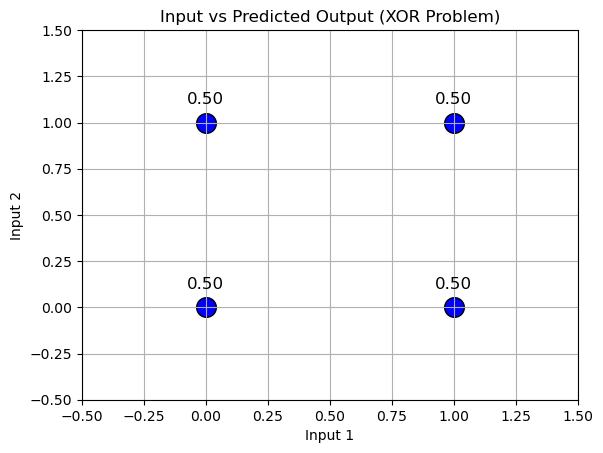

In [230]:
# Plot points with different markers for classes
for i in range(len(inputs)):
    plt.scatter(inputs[i, 0], inputs[i, 1],
                color='red' if predicted_class[i] == 1 else 'blue',
                s=200, marker='o', edgecolors='black', label=f'Output: {outputs[i][0]:.2f}')
    plt.text(inputs[i, 0], inputs[i, 1] + 0.1, f'{outputs[i][0]:.2f}',
             ha='center', fontsize=12, color='black')

plt.title('Input vs Predicted Output (XOR Problem)')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.show()

## Q8. Use TensorFlow and Keras to build a convolutional neural network to classify images from the CIFAR-10 dataset.
 Your code should do the following:

Data Preprocessing: The CIFAR-10 dataset is loaded and normalized (dividing by 255). Labels are one-hot encoded using to_categorical.
Model Architecture: The CNN has three convolutional layers followed by pooling layers and a fully connected layer at the end. The last layer has a softmax activation to classify the images into one of the 10 categories.
Model Compilation: The model is compiled using the Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.
Model Training: The model is trained for 10 epochs with a batch size of 64.
Model Evaluation: The test accuracy is printed after evaluation on the test dataset.
Adjusting Parameters
You can adjust the epochs and batch_size values or add more convolutional and dense layers to improve model performance.

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 67s 0us/step


C:\Users\shatt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.3251 - loss: 1.8205
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5484 - loss: 1.2666
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6140 - loss: 1.0996
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.6501 - loss: 0.9889
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6775 - loss: 0.9100
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7010 - loss: 0.8464
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7262 - loss: 0.7764
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7411 - loss: 0.7377
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7581 - loss: 0.6954
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7719 - loss: 0.6497
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7107 - loss: 0.8348
Test accuracy: 0.7135


***********************************************************************************************************************

## Q9 Implement K-means clustering to segment customers based on shopping data.

1. Convolutional Neural Networks (CNNs)
2. Image processing, kernels, pooling layers,
3. CNN architectures for image classification tasks (MNIST, CIFAR-10)
4. Dimensionality Reduction
5. Principal Component Analysis (PCA)
6. Privacy and Data Security
7. Data protection principles in AI
8. Strategies for secure data collection, storage, and use

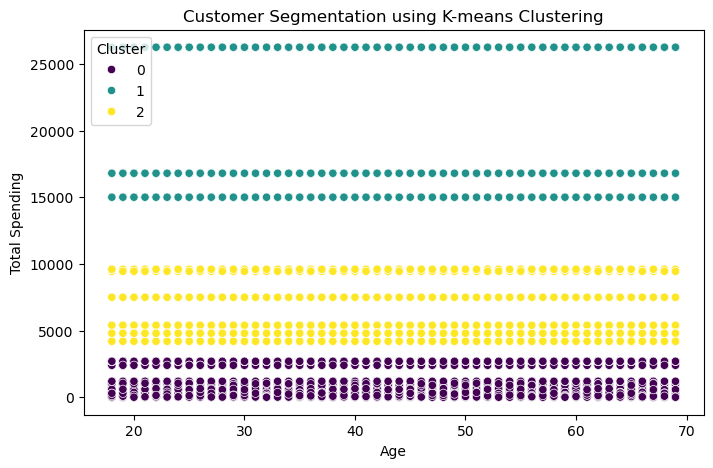

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users 2.0/Desktop/Jenifa/AI-ML/Datasets/customer_shopping_data.csv")

df['Total_Spending'] = df['quantity'] * df['price']
X = df[['age', 'quantity', 'Total_Spending']]

kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='Total_Spending', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.show()


## Q10. Sentiment Analysis Using TextBlob
Question: Given a set of customer reviews, analyze and classify them as positive or negative based on sentiment polarity.

In [4]:
from textblob import TextBlob

reviews = [
    "This product is amazing!", 
    "I hated it. Waste of money.", 
    "Not bad, but could be better.", 
    "Absolutely fantastic service!", 
    "Poor quality, very disappointed."
]

# Sentiment Analysis
for review in reviews:
    sentiment = TextBlob(review).sentiment.polarity
    sentiment_label = 'Positive' if sentiment > 0 else 'Negative'
    print(f"Review: '{review}' | Sentiment: {sentiment_label} (Polarity: {sentiment:.2f})")



Review: 'This product is amazing!' | Sentiment: Positive (Polarity: 0.75)
Review: 'I hated it. Waste of money.' | Sentiment: Negative (Polarity: -0.55)
Review: 'Not bad, but could be better.' | Sentiment: Positive (Polarity: 0.42)
Review: 'Absolutely fantastic service!' | Sentiment: Positive (Polarity: 0.50)
Review: 'Poor quality, very disappointed.' | Sentiment: Negative (Polarity: -0.69)


****************************************************************************************************************

## Q11. Image Classification with Pretrained Model (ResNet50)
Question: Use a pretrained ResNet50 model to classify an image.

In [9]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

model = ResNet50(weights='imagenet')

img_path = "C:/Users 2.0/Pictures/Saved Pictures/desktop-wallpaper-anime-aesthetic-pc-laptop-anime-cool.jpg"
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted: ', decode_predictions(preds, top=3)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted:  [('n02980441', 'castle', 0.69156206), ('n03388043', 'fountain', 0.06918981), ('n03930313', 'picket_fence', 0.028028011)]


## ************************************************************************************************************************

## Q12. Sentiment Analysis using VADER
Question: Given a dataset of customer reviews, classify each review as positive, negative, or neutral using VADER sentiment analysis and visualize the results.

                             review  sentiment_score sentiment_label
0          This product is amazing!           0.6239        Positive
1       I hated it. Waste of money.          -0.7906        Negative
2     Not bad, but could be better.           0.6980        Positive
3     Absolutely fantastic service!           0.6352        Positive
4  Poor quality, very disappointed.          -0.7574        Negative


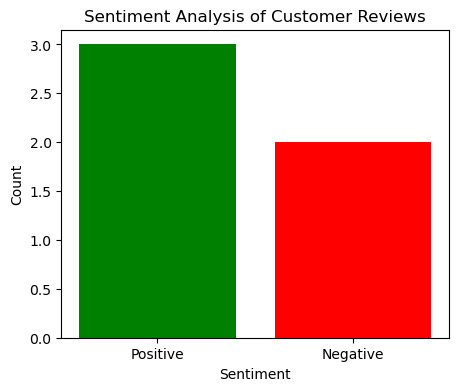

In [4]:
#by GPT
# Step 2: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Step 3: Sample data (replace this with your actual dataset of customer reviews)
reviews = [
    "This product is amazing!",
    "I hated it. Waste of money.",
    "Not bad, but could be better.",
    "Absolutely fantastic service!",
    "Poor quality, very disappointed."
]
data = pd.DataFrame(reviews, columns=['review'])

# Step 4: Sentiment Analysis with VADER
analyzer = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
data['sentiment_label'] = data['sentiment_score'].apply(lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral'))

# Step 5: Display the results
print(data)

# Step 6: Visualization of the sentiment distribution
sentiment_counts = data['sentiment_label'].value_counts()
plt.figure(figsize=(5, ))  # Define size (width, height)
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'grey'])
plt.title("Sentiment Analysis of Customer Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


                                              Review Sentiment
0               I love this product, it's fantastic!  Positive
1     Terrible experience, I would not recommend it.  Negative
2      Average quality, nothing special but not bad.  Positive
3            Absolutely amazing! Best purchase ever!  Positive
4    It's okay, does the job but not worth the hype.  Negative
5  Worst product I’ve ever bought. Totally disapp...  Negative
6                   Great quality and fast delivery!  Positive
7                Not great, but not terrible either.  Positive
8          Exceeded my expectations! Will buy again!   Neutral
9                        Awful, broke after one use.  Negative


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shatt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


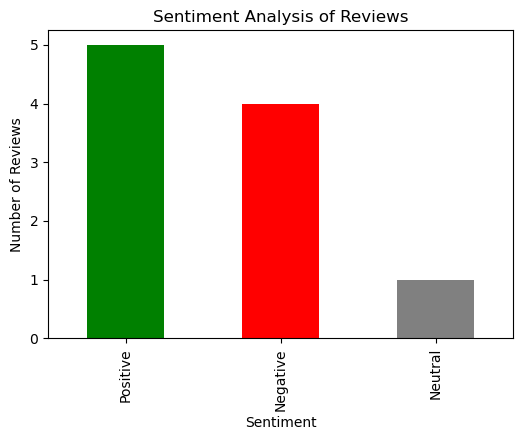

In [6]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk

nltk.download('vader_lexicon')

reviews = [
    "I love this product, it's fantastic!",
    "Terrible experience, I would not recommend it.",
    "Average quality, nothing special but not bad.",
    "Absolutely amazing! Best purchase ever!",
    "It's okay, does the job but not worth the hype.",
    "Worst product I’ve ever bought. Totally disappointing.",
    "Great quality and fast delivery!",
    "Not great, but not terrible either.",
    "Exceeded my expectations! Will buy again!",
    "Awful, broke after one use."
]

df = pd.DataFrame(reviews, columns=['Review'])

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(review):
    score = sia.polarity_scores(review)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Review'].apply(analyze_sentiment)
print(df)

sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6, 4))  
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()
